In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/results-from-bert/glassdoor_data_distilbert_finetuned.csv
/kaggle/input/results-from-bert/validation_results.csv
/kaggle/input/raw-final-evaluation-data/evaluation_data_raw_final.csv
/kaggle/input/final-company-reviews-dataset-cleaned/final_sg_companies_reviews_clean.csv
/kaggle/input/final-evaluation-data-for-company-reviews/final_evaluation_data.csv
/kaggle/input/companies-reviews-unprocessed/sg_companies_reviews.csv


In [2]:
!pip install pyabsa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.9 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=721b5f916b0e7433596cc7a986383777fb8906db847c938d60f74f8285fa644e
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver

### Import Data

In [3]:
company_reviews = pd.read_csv('/kaggle/input/results-from-bert/glassdoor_data_distilbert_finetuned.csv')
company_reviews.head()

id Company Name  \
0            2024-02-12 00:00:00Good pay, hard work0       Amazon   
1        2016-01-10 00:00:00You Get What You Put In1       Amazon   
2  2016-02-20 00:00:00Exciting Work, Abusive Cult...       Amazon   
3  2013-12-17 00:00:00Can be amazing for some peo...       Amazon   
4       2018-02-23 00:00:00An Amazing Place to Work4       Amazon   

   Overall Rating Review Date  \
0             5.0  2024-02-12   
1             5.0  2016-01-10   
2             3.0  2016-02-20   
3             4.0  2013-12-17   
4             5.0  2018-02-23   

                                        Review Title  \
0                                 good pay hard work   
1                            you get what you put in   
2                      exciting work abusive culture   
3  can be amazing for some people horrible for ot...   
4                           an amazing place to work   

                      Job Title                         Job Details  \
0               area manager ii   former employee more than 3 years   
1            anonymous employee                    current employee   
2    senior engineering manager  current employee more than 8 years   
3  software development manager  current employee more than 3 years   
4  software development manager   current employee less than 1 year   

      Location                                               Pros  \
0  Romulus, MI                    pay autonomy plenty of benefits   
1  Seattle, WA  really smart people a lot of opportunity for g...   
2  Seattle, WA  jeff bezos and his steam are brilliant and con...   
3  Seattle, WA  amazon is doing lots of cool stuffbut lots of ...   
4  Phoenix, AZ  ive been at amazon for a month now and ive see...   

                                                Cons  \
0  it was hard work in a warehouse many days of 1...   
1  you have to be self motivated no one will hold...   
2  the management process is abusive and im curre...   
3  youre responsible for your own career progress...   
4  no cons so far seriously like i said im sure a...   

                           Overall Review with Title Predicted Sentiment  
0  good pay hard work // pay autonomy plenty of b...            Positive  
1  you get what you put in // really smart people...            Positive  
2  exciting work abusive culture // jeff bezos an...            Positive  
3  can be amazing for some people horrible for ot...            Negative  
4  an amazing place to work // ive been at amazon...            Positive

In [4]:
len(company_reviews)

18349

In [5]:
len(company_reviews)

18349

In [6]:
# Find duplicates
duplicates = company_reviews[company_reviews.duplicated()]

duplicates

Empty DataFrame
Columns: [id, Company Name, Overall Rating, Review Date, Review Title, Job Title, Job Details, Location, Pros, Cons, Overall Review with Title, Predicted Sentiment]
Index: []

In [7]:
duplicates

Empty DataFrame
Columns: [id, Company Name, Overall Rating, Review Date, Review Title, Job Title, Job Details, Location, Pros, Cons, Overall Review with Title, Predicted Sentiment]
Index: []

In [8]:
company_reviews

id Company Name  \
0                2024-02-12 00:00:00Good pay, hard work0       Amazon   
1            2016-01-10 00:00:00You Get What You Put In1       Amazon   
2      2016-02-20 00:00:00Exciting Work, Abusive Cult...       Amazon   
3      2013-12-17 00:00:00Can be amazing for some peo...       Amazon   
4           2018-02-23 00:00:00An Amazing Place to Work4       Amazon   
...                                                  ...          ...   
18344                2023-05-26 00:00:00Not exactly20030  Informatica   
18345  2022-02-25 00:00:00Micro managers R US (and we...  Informatica   
18346  2023-05-15 00:00:00easy job but alot of change...  Informatica   
18347        2022-09-30 00:00:00Great place to work20033  Informatica   
18348                      2023-04-29 00:00:00Toxic20034  Informatica   

       Overall Rating Review Date  \
0                 5.0  2024-02-12   
1                 5.0  2016-01-10   
2                 3.0  2016-02-20   
3                 4.0  2013-12-17   
4                 5.0  2018-02-23   
...               ...         ...   
18344             2.0  2023-05-26   
18345             1.0  2022-02-25   
18346             3.0  2023-05-15   
18347             5.0  2022-09-30   
18348             1.0  2023-04-29   

                                            Review Title  \
0                                     good pay hard work   
1                                you get what you put in   
2                          exciting work abusive culture   
3      can be amazing for some people horrible for ot...   
4                               an amazing place to work   
...                                                  ...   
18344                                        not exactly   
18345  micro managers r us and weve got spreadsheets ...   
18346                       easy job but alot of changes   
18347                                great place to work   
18348                                              toxic   

                          Job Title                         Job Details  \
0                   area manager ii   former employee more than 3 years   
1                anonymous employee                    current employee   
2        senior engineering manager  current employee more than 8 years   
3      software development manager  current employee more than 3 years   
4      software development manager   current employee less than 1 year   
...                             ...                                 ...   
18344                data scientist    former employee less than 1 year   
18345                     developer   former employee more than 3 years   
18346  business development manager   current employee more than 1 year   
18347                      director   current employee less than 1 year   
18348             account executive    former employee more than 1 year   

          Location                                               Pros  \
0      Romulus, MI                    pay autonomy plenty of benefits   
1      Seattle, WA  really smart people a lot of opportunity for g...   
2      Seattle, WA  jeff bezos and his steam are brilliant and con...   
3      Seattle, WA  amazon is doing lots of cool stuffbut lots of ...   
4      Phoenix, AZ  ive been at amazon for a month now and ive see...   
...            ...                                                ...   
18344   Austin, TX  great office location and some really good people   
18345          NaN  its a funny company informatica they like to m...   
18346   Austin, TX                   great people good pay free trips   
18347          NaN  the company has a great cuture and the nice th...   
18348   Dallas, TX  good overall benefits and pay sko is strong an...   

                                                    Cons  \
0      it was hard work in a warehouse many days of 1...   
1      you have to be self motivated no one will hold...   
2      the management process is abusive and im curre

In [9]:
company_reviews.iloc[1]['Overall Review with Title']

'you get what you put in // really smart people a lot of opportunity for growth always encouraged to be innovative think big and create something new competitive salary and benefits with other major tech companies 100 self motivating work environment no dress code and 4 legged friends are welcome you have to be self motivated no one will hold your hand and tell you that youre doing a great job if you need constant affirmations from management this company isnt for you'

In [10]:
# Rename column 'A' to 'New_Column_Name'
company_reviews = company_reviews.rename(columns={'Predicted Sentiment': 'BERT_Sentiment'})


### 1. Preprocess + extract aspects from subset of Company Review dataset

In [11]:
import time

In [12]:
#from pyabsa.framework.dataset_class import detect_infer_dataset, detect_dataset
from pyabsa.utils import make_ABSA_dataset

company_reviews = company_reviews.drop_duplicates()
#company_reviews['num_words'] = company_reviews.apply(lambda x: len(x['Review'].split(" ")), axis=1)
#company_reviews = company_reviews.loc[company_reviews['num_words']>5]

#company_reviews = company_reviews.reset_index(drop=True)
#company_reviews = company_reviews.drop(columns=['num_words'])

company_reviews_only = company_reviews[['Overall Review with Title']]
company_reviews_only.to_csv('preprocessed_company_review_data', index=False, header=False)
start_time = time.time()
company_review_dataset = make_ABSA_dataset(dataset_name_or_path='preprocessed_company_review_data', checkpoint='english')
end_time = time.time()
# company_reviews_only = company_reviews[['Review_cleaned']]
# company_reviews_only.to_csv('preprocessed_company_review_data.inference', index=False, header=False)
# company_review_dataset = make_ABSA_dataset('preprocessed_company_review_data.inference')

[2024-03-29 14:18:27] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






2024-03-29 14:18:28.895553: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 14:18:28.895662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 14:18:29.037089: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


[2024-03-29 14:18:49] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-03-29 14:18:49] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-03-29 14:18:49] (2.4.1.post1) Downloading checkpoint:english 
[2024-03-29 14:18:49] (2.4.1.post1) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


Find zipped checkpoint: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip, unzipping


Done.
[2024-03-29 14:19:01] (2.4.1.post1) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip 
[2024-03-29 14:19:01] (2.4.1.post1) Load aspect extractor from checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2024-03-29 14:19:01] (2.4.1.post1) config: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.config
[2024-03-29 14:19:01] (2.4.1.post1) state_dict: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.state_dict
[2024-03-29 14:19:01] (2.4.1.post1) model: None
[2024-03-29 14:19:01] (2.4.1.post1) tokenizer: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.tokenizer
[2024-03-29 1

/opt/conda/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:503: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


[2024-03-29 14:19:11] (2.4.1.post1) Start processing dataset: preprocessed_company_review_data


preparing apc inference dataloader: 100%|██████████| 23049/23049 [01:45<00:00, 218.87it/s]
/opt/conda/lib/python3.10/site-packages/pyabsa/tasks/AspectTermExtraction/prediction/aspect_extractor.py:593: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:261.)
  lcf_cdm_vec = torch.tensor(
classifying aspect sentiments: 100%|██████████| 721/721 [08:13<00:00,  1.46it/s]


[2024-03-29 14:37:05] (2.4.1.post1) The results of aspect term extraction have been saved in /kaggle/working/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-03-29 14:37:07] (2.4.1.post1) Example 0: good <pay:Positive Confidence:0.88> hard work / / pay autonomy plenty of <benefits:Positive Confidence:0.9721> it was hard work in a warehouse many days of 15000 + steps
[2024-03-29 14:37:07] (2.4.1.post1) Example 1: you get what you put in / / really smart people a lot of opportunity for growth always encouraged to be innovative think big and create something new competitive salary and benefits with other major tech companies 100 self motivating work <environment:Positive Confidence:0.9748> no <dress code:Positive Confidence:0.8659> and 4 legged friends are welcome you have to be self motivated no one will hold your hand and tell you that youre doing a great job if you need constant affirmations from management this company isnt for you
[2024-03-29 14:37:

In [13]:
print("Time take to extract and classify aspects is",str(end_time-start_time))

Time take to extract and classify aspects is 1101.5543389320374


In [14]:
company_reviews_only

Overall Review with Title
0      good pay hard work // pay autonomy plenty of b...
1      you get what you put in // really smart people...
2      exciting work abusive culture // jeff bezos an...
3      can be amazing for some people horrible for ot...
4      an amazing place to work // ive been at amazon...
...                                                  ...
18344  not exactly // great office location and some ...
18345  micro managers r us and weve got spreadsheets ...
18346  easy job but alot of changes // great people g...
18347  great place to work // the company has a great...
18348  toxic // good overall benefits and pay sko is ...

[18349 rows x 1 columns]

In [15]:
company_reviews

id Company Name  \
0                2024-02-12 00:00:00Good pay, hard work0       Amazon   
1            2016-01-10 00:00:00You Get What You Put In1       Amazon   
2      2016-02-20 00:00:00Exciting Work, Abusive Cult...       Amazon   
3      2013-12-17 00:00:00Can be amazing for some peo...       Amazon   
4           2018-02-23 00:00:00An Amazing Place to Work4       Amazon   
...                                                  ...          ...   
18344                2023-05-26 00:00:00Not exactly20030  Informatica   
18345  2022-02-25 00:00:00Micro managers R US (and we...  Informatica   
18346  2023-05-15 00:00:00easy job but alot of change...  Informatica   
18347        2022-09-30 00:00:00Great place to work20033  Informatica   
18348                      2023-04-29 00:00:00Toxic20034  Informatica   

       Overall Rating Review Date  \
0                 5.0  2024-02-12   
1                 5.0  2016-01-10   
2                 3.0  2016-02-20   
3                 4.0  2013-12-17   
4                 5.0  2018-02-23   
...               ...         ...   
18344             2.0  2023-05-26   
18345             1.0  2022-02-25   
18346             3.0  2023-05-15   
18347             5.0  2022-09-30   
18348             1.0  2023-04-29   

                                            Review Title  \
0                                     good pay hard work   
1                                you get what you put in   
2                          exciting work abusive culture   
3      can be amazing for some people horrible for ot...   
4                               an amazing place to work   
...                                                  ...   
18344                                        not exactly   
18345  micro managers r us and weve got spreadsheets ...   
18346                       easy job but alot of changes   
18347                                great place to work   
18348                                              toxic   

                          Job Title                         Job Details  \
0                   area manager ii   former employee more than 3 years   
1                anonymous employee                    current employee   
2        senior engineering manager  current employee more than 8 years   
3      software development manager  current employee more than 3 years   
4      software development manager   current employee less than 1 year   
...                             ...                                 ...   
18344                data scientist    former employee less than 1 year   
18345                     developer   former employee more than 3 years   
18346  business development manager   current employee more than 1 year   
18347                      director   current employee less than 1 year   
18348             account executive    former employee more than 1 year   

          Location                                               Pros  \
0      Romulus, MI                    pay autonomy plenty of benefits   
1      Seattle, WA  really smart people a lot of opportunity for g...   
2      Seattle, WA  jeff bezos and his steam are brilliant and con...   
3      Seattle, WA  amazon is doing lots of cool stuffbut lots of ...   
4      Phoenix, AZ  ive been at amazon for a month now and ive see...   
...            ...                                                ...   
18344   Austin, TX  great office location and some really good people   
18345          NaN  its a funny company informatica they like to m...   
18346   Austin, TX                   great people good pay free trips   
18347          NaN  the company has a great cuture and the nice th...   
18348   Dallas, TX  good overall benefits and pay sko is strong an...   

                                                    Cons  \
0      it was hard work in a warehouse many days of 1...   
1      you have to be self motivated no one will hold...   
2      the management process is abusive and im curre

In [16]:
len(company_reviews_only)

18349

In [17]:
# Reset the index
company_reviews.reset_index(drop=True, inplace=True)


### 2. Aspect-level polarity classification

In [18]:
company_atepc_result = pd.read_json('/kaggle/working/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json')

In [19]:
company_atepc_result

sentence  \
0      good pay hard work / / pay autonomy plenty of ...   
1      you get what you put in / / really smart peopl...   
2      exciting work abusive culture / / jeff bezos a...   
3      can be amazing for some people horrible for ot...   
4      an amazing place to work / / ive been at amazo...   
...                                                  ...   
18344  not exactly / / great office location and some...   
18345  micro managers r us and weve got spreadsheets ...   
18346  easy job but alot of changes / / great people ...   
18347  great place to work / / the company has a grea...   
18348  toxic / / good overall benefits and pay sko is...   

                                                     IOB  \
0      [O, B-ASP, O, O, O, O, O, O, O, O, B-ASP, O, O...   
1      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2      [O, O, O, O, O, O, O, B-ASP, O, O, O, O, O, O,...   
3      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4      [O, O, B-ASP, O, O, O, O, O, O, O, B-ASP, O, O...   
...                                                  ...   
18344  [O, O, O, O, O, O, B-ASP, O, O, O, O, B-ASP, O...   
18345  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
18346  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
18347  [O, O, O, O, O, O, O, O, O, O, O, B-ASP, O, O,...   
18348  [O, O, O, O, O, B-ASP, O, B-ASP, I-ASP, O, O, ...   

                                                  tokens  \
0      [good, pay, hard, work, /, /, pay, autonomy, p...   
1      [you, get, what, you, put, in, /, /, really, s...   
2      [exciting, work, abusive, culture, /, /, jeff,...   
3      [can, be, amazing, for, some, people, horrible...   
4      [an, amazing, place, to, work, /, /, ive, been...   
...                                                  ...   
18344  [not, exactly, /, /, great, office, location, ...   
18345  [micro, managers, r, us, and, weve, got, sprea...   
18346  [easy, job, but, alot, of, changes, /, /, grea...   
18347  [great, place, to, work, /, /, the, company, h...   
18348  [toxic, /, /, good, overall, benefits, and, pa...   

                          aspect            position  \
0                [pay, benefits]         [[1], [10]]   
1      [environment, dress code]    [[41], [43, 44]]   
2            [bezos, management]         [[7], [79]]   
3                             []                  []   
4       [place, amazon, balance]  [[2], [10], [234]]   
...                          ...                 ...   
18344         [location, people]         [[6], [11]]   
18345                         []                  []   
18346                         []                  []   
18347              [cuture, mix]        [[11], [21]]   
18348        [benefits, pay sko]       [[5], [7, 8]]   

                            sentiment  \
0                [Positive, Positive]   
1                [Positive, Positive]   
2                [Positive, Negative]   
3                                  []   
4      [Positive, Positive, Positive]   
...                               ...   
18344             [Neutral, Positive]   
18345                              []   
18346                              []   
18347            [Positive, Positive]   
18348            [Positive, Positive]   

                                                   probs  \
0      [[0.11926588416099501, 0.0007681544520890001, ...   
1      [[0.024461025372147, 0.0006920149899080001, 0....   
2      [[0.435907185077667, 0.000631120288744, 0.5634...   
3                                                     []   
4      [[0.001275023911148, 0.000407961517339, 0.9983...   
...                                                  ...   
18344  [[0.013467683456838, 0.978248715400695, 0.0082...   
18345                                                 []   
18346                                                 []   
18347  [[0.004255812615156, 0.00022892341075900002, 0...   
18348  [[0.0019939446356140003, 0.0004348887887310000...   

In [20]:
company_reviews.columns

Index(['id', 'Company Name', 'Overall Rating', 'Review Date', 'Review Title',
       'Job Title', 'Job Details', 'Location', 'Pros', 'Cons',
       'Overall Review with Title', 'BERT_Sentiment'],
      dtype='object')

#### 2a. Aggregation of aspect-level polarity classification scores to review-level polarity classification

In [21]:
company_atepc_result['negative_score'] = company_atepc_result.apply(lambda x: sum([max(x['probs'][j]) for j in [i for i,d in enumerate(x['sentiment']) if d=='Negative']]), axis=1)
company_atepc_result['positive_score'] = company_atepc_result.apply(lambda x: sum([max(x['probs'][j]) for j in [i for i,d in enumerate(x['sentiment']) if d=='Positive']]), axis=1)
company_atepc_result['neutral_score'] = company_atepc_result.apply(lambda x: sum([max(x['probs'][j]) for j in [i for i,d in enumerate(x['sentiment']) if d=='Neutral']]), axis=1)


company_atepc_result['atepc_final_aggregated_sentiment'] = company_atepc_result.apply(lambda x: 'Positive' if (x['positive_score'] > x['negative_score'] and x['positive_score'] > x['neutral_score']) else\
                                                           ('Negative' if (x['negative_score'] > x['positive_score'] and x['negative_score'] > x['neutral_score']) else 'Neutral'), axis=1)
company_atepc_result

sentence  \
0      good pay hard work / / pay autonomy plenty of ...   
1      you get what you put in / / really smart peopl...   
2      exciting work abusive culture / / jeff bezos a...   
3      can be amazing for some people horrible for ot...   
4      an amazing place to work / / ive been at amazo...   
...                                                  ...   
18344  not exactly / / great office location and some...   
18345  micro managers r us and weve got spreadsheets ...   
18346  easy job but alot of changes / / great people ...   
18347  great place to work / / the company has a grea...   
18348  toxic / / good overall benefits and pay sko is...   

                                                     IOB  \
0      [O, B-ASP, O, O, O, O, O, O, O, O, B-ASP, O, O...   
1      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
2      [O, O, O, O, O, O, O, B-ASP, O, O, O, O, O, O,...   
3      [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
4      [O, O, B-ASP, O, O, O, O, O, O, O, B-ASP, O, O...   
...                                                  ...   
18344  [O, O, O, O, O, O, B-ASP, O, O, O, O, B-ASP, O...   
18345  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
18346  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...   
18347  [O, O, O, O, O, O, O, O, O, O, O, B-ASP, O, O,...   
18348  [O, O, O, O, O, B-ASP, O, B-ASP, I-ASP, O, O, ...   

                                                  tokens  \
0      [good, pay, hard, work, /, /, pay, autonomy, p...   
1      [you, get, what, you, put, in, /, /, really, s...   
2      [exciting, work, abusive, culture, /, /, jeff,...   
3      [can, be, amazing, for, some, people, horrible...   
4      [an, amazing, place, to, work, /, /, ive, been...   
...                                                  ...   
18344  [not, exactly, /, /, great, office, location, ...   
18345  [micro, managers, r, us, and, weve, got, sprea...   
18346  [easy, job, but, alot, of, changes, /, /, grea...   
18347  [great, place, to, work, /, /, the, company, h...   
18348  [toxic, /, /, good, overall, benefits, and, pa...   

                          aspect            position  \
0                [pay, benefits]         [[1], [10]]   
1      [environment, dress code]    [[41], [43, 44]]   
2            [bezos, management]         [[7], [79]]   
3                             []                  []   
4       [place, amazon, balance]  [[2], [10], [234]]   
...                          ...                 ...   
18344         [location, people]         [[6], [11]]   
18345                         []                  []   
18346                         []                  []   
18347              [cuture, mix]        [[11], [21]]   
18348        [benefits, pay sko]       [[5], [7, 8]]   

                            sentiment  \
0                [Positive, Positive]   
1                [Positive, Positive]   
2                [Positive, Negative]   
3                                  []   
4      [Positive, Positive, Positive]   
...                               ...   
18344             [Neutral, Positive]   
18345                              []   
18346                              []   
18347            [Positive, Positive]   
18348            [Positive, Positive]   

                                                   probs  \
0      [[0.11926588416099501, 0.0007681544520890001, ...   
1      [[0.024461025372147, 0.0006920149899080001, 0....   
2      [[0.435907185077667, 0.000631120288744, 0.5634...   
3                                                     []   
4      [[0.001275023911148, 0.000407961517339, 0.9983...   
...                                                  ...   
18344  [[0.013467683456838, 0.978248715400695, 0.0082...   
18345                                                 []   
18346                                                 []   
18347  [[0.004255812615156, 0.00022892341075900002, 0...   
18348  [[0.0019939446356140003, 0.0004348887887310000...   

In [22]:
# Merge DataFrames
merged_df_company_reviews_atepc = pd.concat([company_reviews, company_atepc_result], axis=1)

merged_df_company_reviews_atepc

id Company Name  \
0                2024-02-12 00:00:00Good pay, hard work0       Amazon   
1            2016-01-10 00:00:00You Get What You Put In1       Amazon   
2      2016-02-20 00:00:00Exciting Work, Abusive Cult...       Amazon   
3      2013-12-17 00:00:00Can be amazing for some peo...       Amazon   
4           2018-02-23 00:00:00An Amazing Place to Work4       Amazon   
...                                                  ...          ...   
18344                2023-05-26 00:00:00Not exactly20030  Informatica   
18345  2022-02-25 00:00:00Micro managers R US (and we...  Informatica   
18346  2023-05-15 00:00:00easy job but alot of change...  Informatica   
18347        2022-09-30 00:00:00Great place to work20033  Informatica   
18348                      2023-04-29 00:00:00Toxic20034  Informatica   

       Overall Rating Review Date  \
0                 5.0  2024-02-12   
1                 5.0  2016-01-10   
2                 3.0  2016-02-20   
3                 4.0  2013-12-17   
4                 5.0  2018-02-23   
...               ...         ...   
18344             2.0  2023-05-26   
18345             1.0  2022-02-25   
18346             3.0  2023-05-15   
18347             5.0  2022-09-30   
18348             1.0  2023-04-29   

                                            Review Title  \
0                                     good pay hard work   
1                                you get what you put in   
2                          exciting work abusive culture   
3      can be amazing for some people horrible for ot...   
4                               an amazing place to work   
...                                                  ...   
18344                                        not exactly   
18345  micro managers r us and weve got spreadsheets ...   
18346                       easy job but alot of changes   
18347                                great place to work   
18348                                              toxic   

                          Job Title                         Job Details  \
0                   area manager ii   former employee more than 3 years   
1                anonymous employee                    current employee   
2        senior engineering manager  current employee more than 8 years   
3      software development manager  current employee more than 3 years   
4      software development manager   current employee less than 1 year   
...                             ...                                 ...   
18344                data scientist    former employee less than 1 year   
18345                     developer   former employee more than 3 years   
18346  business development manager   current employee more than 1 year   
18347                      director   current employee less than 1 year   
18348             account executive    former employee more than 1 year   

          Location                                               Pros  \
0      Romulus, MI                    pay autonomy plenty of benefits   
1      Seattle, WA  really smart people a lot of opportunity for g...   
2      Seattle, WA  jeff bezos and his steam are brilliant and con...   
3      Seattle, WA  amazon is doing lots of cool stuffbut lots of ...   
4      Phoenix, AZ  ive been at amazon for a month now and ive see...   
...            ...                                                ...   
18344   Austin, TX  great office location and some really good people   
18345          NaN  its a funny company informatica they like to m...   
18346   Austin, TX                   great people good pay free trips   
18347          NaN  the company has a great cuture and the nice th...   
18348   Dallas, TX  good overall benefits and pay sko is strong an...   

                                                    Cons  ...  \
0      it was hard work in a warehouse many days of 1...  ...   
1      you have to be self motivated no one will hold...  ...   
2      the management process is abusi

In [23]:
merged_df_company_reviews_atepc.columns

Index(['id', 'Company Name', 'Overall Rating', 'Review Date', 'Review Title',
       'Job Title', 'Job Details', 'Location', 'Pros', 'Cons',
       'Overall Review with Title', 'BERT_Sentiment', 'sentence', 'IOB',
       'tokens', 'aspect', 'position', 'sentiment', 'probs', 'confidence',
       'negative_score', 'positive_score', 'neutral_score',
       'atepc_final_aggregated_sentiment'],
      dtype='object')

### Random Accuracy Check for BERT Classification:

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

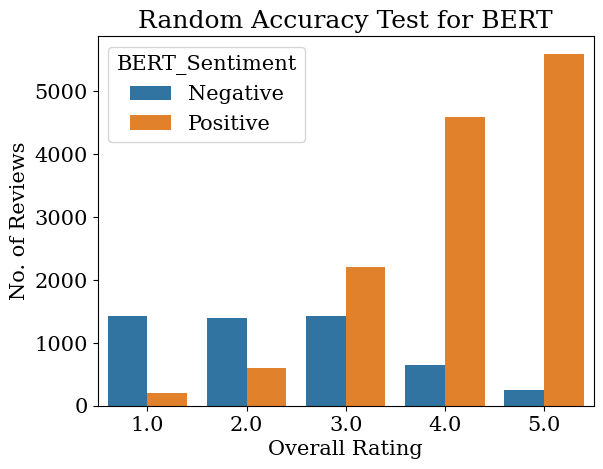

In [25]:
# Group by Category1 and Category2 and calculate counts
counts = merged_df_company_reviews_atepc.groupby(['Overall Rating', 'BERT_Sentiment']).size().reset_index(name='No. of Reviews')

# Plotting clustered bar chart
sns.barplot(data=counts, x='Overall Rating', y='No. of Reviews', hue='BERT_Sentiment')
plt.title('Random Accuracy Test for BERT')
plt.xlabel('Overall Rating')
plt.ylabel('No. of Reviews')
plt.show()

### Random Accuracy Check for ATEPC Classification:

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

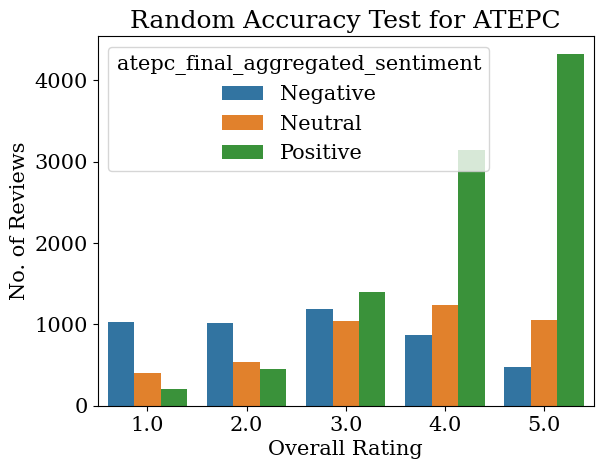

In [27]:
# Group by Category1 and Category2 and calculate counts
counts = merged_df_company_reviews_atepc.groupby(['Overall Rating', 'atepc_final_aggregated_sentiment']).size().reset_index(name='No. of Reviews')

# Plotting clustered bar chart
sns.barplot(data=counts, x='Overall Rating', y='No. of Reviews', hue='atepc_final_aggregated_sentiment')
plt.title('Random Accuracy Test for ATEPC')
plt.xlabel('Overall Rating')
plt.ylabel('No. of Reviews')
plt.show()

### Perform Random Accuracy Check for Vader too:

In [28]:
# Model definition
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Create model specifications with different lexicons
vader = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/decorators.py:69: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  signature = inspect.formatargspec(regargs, varargs, varkwargs, defaults,
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [29]:
# Generate classification functions
# Baseline VADER

def sentiment_vader(sentence):

    sentiment_dict = vader.polarity_scores(sentence)

    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] > 0.05 :
        overall_sentiment = 'Positive'

    elif sentiment_dict['compound'] < -0.05 :
        overall_sentiment = 'Negative'

    else :
        overall_sentiment = 'Neutral'

    return overall_sentiment

In [30]:
# apply classification function
start_time = time.time()
merged_df_company_reviews_atepc['vader_sentiment'] = np.vectorize(sentiment_vader)(merged_df_company_reviews_atepc['Overall Review with Title'])
end_time = time.time()

print("Time take for classification using vader is", str(end_time-start_time))

Time take for classification using vader is 15.628818273544312


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if

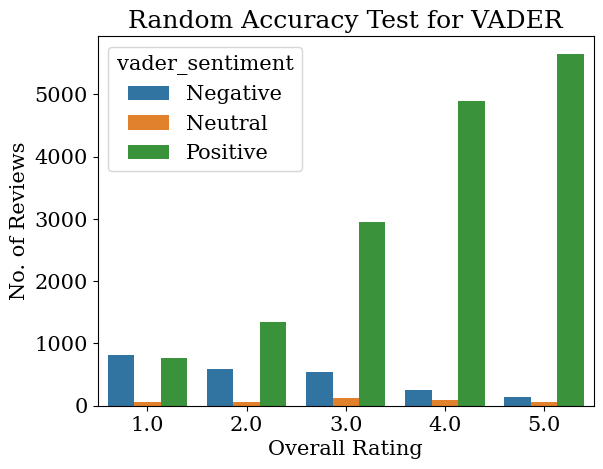

In [31]:
# Group by Category1 and Category2 and calculate counts
vader_counts = merged_df_company_reviews_atepc.groupby(['Overall Rating', 'vader_sentiment']).size().reset_index(name='No. of Reviews')

# Plotting clustered bar chart
sns.barplot(data=vader_counts, x='Overall Rating', y='No. of Reviews', hue='vader_sentiment')
plt.title('Random Accuracy Test for VADER')
plt.xlabel('Overall Rating')
plt.ylabel('No. of Reviews')
plt.show()

In [32]:
merged_df_company_reviews_atepc.iloc[0]

id                                            2024-02-12 00:00:00Good pay, hard work0
Company Name                                                                   Amazon
Overall Rating                                                                    5.0
Review Date                                                                2024-02-12
Review Title                                                       good pay hard work
Job Title                                                             area manager ii
Job Details                                         former employee more than 3 years
Location                                                                  Romulus, MI
Pros                                                  pay autonomy plenty of benefits
Cons                                it was hard work in a warehouse many days of 1...
Overall Review with Title           good pay hard work // pay autonomy plenty of b...
BERT_Sentiment                                        

In [33]:
merged_df_company_reviews_atepc

id Company Name  \
0                2024-02-12 00:00:00Good pay, hard work0       Amazon   
1            2016-01-10 00:00:00You Get What You Put In1       Amazon   
2      2016-02-20 00:00:00Exciting Work, Abusive Cult...       Amazon   
3      2013-12-17 00:00:00Can be amazing for some peo...       Amazon   
4           2018-02-23 00:00:00An Amazing Place to Work4       Amazon   
...                                                  ...          ...   
18344                2023-05-26 00:00:00Not exactly20030  Informatica   
18345  2022-02-25 00:00:00Micro managers R US (and we...  Informatica   
18346  2023-05-15 00:00:00easy job but alot of change...  Informatica   
18347        2022-09-30 00:00:00Great place to work20033  Informatica   
18348                      2023-04-29 00:00:00Toxic20034  Informatica   

       Overall Rating Review Date  \
0                 5.0  2024-02-12   
1                 5.0  2016-01-10   
2                 3.0  2016-02-20   
3                 4.0  2013-12-17   
4                 5.0  2018-02-23   
...               ...         ...   
18344             2.0  2023-05-26   
18345             1.0  2022-02-25   
18346             3.0  2023-05-15   
18347             5.0  2022-09-30   
18348             1.0  2023-04-29   

                                            Review Title  \
0                                     good pay hard work   
1                                you get what you put in   
2                          exciting work abusive culture   
3      can be amazing for some people horrible for ot...   
4                               an amazing place to work   
...                                                  ...   
18344                                        not exactly   
18345  micro managers r us and weve got spreadsheets ...   
18346                       easy job but alot of changes   
18347                                great place to work   
18348                                              toxic   

                          Job Title                         Job Details  \
0                   area manager ii   former employee more than 3 years   
1                anonymous employee                    current employee   
2        senior engineering manager  current employee more than 8 years   
3      software development manager  current employee more than 3 years   
4      software development manager   current employee less than 1 year   
...                             ...                                 ...   
18344                data scientist    former employee less than 1 year   
18345                     developer   former employee more than 3 years   
18346  business development manager   current employee more than 1 year   
18347                      director   current employee less than 1 year   
18348             account executive    former employee more than 1 year   

          Location                                               Pros  \
0      Romulus, MI                    pay autonomy plenty of benefits   
1      Seattle, WA  really smart people a lot of opportunity for g...   
2      Seattle, WA  jeff bezos and his steam are brilliant and con...   
3      Seattle, WA  amazon is doing lots of cool stuffbut lots of ...   
4      Phoenix, AZ  ive been at amazon for a month now and ive see...   
...            ...                                                ...   
18344   Austin, TX  great office location and some really good people   
18345          NaN  its a funny company informatica they like to m...   
18346   Austin, TX                   great people good pay free trips   
18347          NaN  the company has a great cuture and the nice th...   
18348   Dallas, TX  good overall benefits and pay sko is strong an...   

                                                    Cons  ...  \
0      it was hard work in a warehouse many days of 1...  ...   
1      you have to be self motivated no one will hold...  ...   
2      the management process is abusi

In [34]:
merged_df_company_reviews_atepc.to_csv('glassdoor_data_distilbert_finetuned_atepc_vader.csv', index=False,header=True)

### Random Accuracy Test:

Exclude Ratings 3, look at Ratings 1, 2, 4 and 5

Let Ratings 1, 2 be negative and Ratings 4 and 5 be positive

In [35]:
# Function to map ratings to sentiment
def map_sentiment(rating):
    if rating <=2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create the new column
merged_df_company_reviews_atepc['Sentiment'] = merged_df_company_reviews_atepc['Overall Rating'].apply(lambda x: map_sentiment(x))

In [36]:
merged_df_company_reviews_atepc

id Company Name  \
0                2024-02-12 00:00:00Good pay, hard work0       Amazon   
1            2016-01-10 00:00:00You Get What You Put In1       Amazon   
2      2016-02-20 00:00:00Exciting Work, Abusive Cult...       Amazon   
3      2013-12-17 00:00:00Can be amazing for some peo...       Amazon   
4           2018-02-23 00:00:00An Amazing Place to Work4       Amazon   
...                                                  ...          ...   
18344                2023-05-26 00:00:00Not exactly20030  Informatica   
18345  2022-02-25 00:00:00Micro managers R US (and we...  Informatica   
18346  2023-05-15 00:00:00easy job but alot of change...  Informatica   
18347        2022-09-30 00:00:00Great place to work20033  Informatica   
18348                      2023-04-29 00:00:00Toxic20034  Informatica   

       Overall Rating Review Date  \
0                 5.0  2024-02-12   
1                 5.0  2016-01-10   
2                 3.0  2016-02-20   
3                 4.0  2013-12-17   
4                 5.0  2018-02-23   
...               ...         ...   
18344             2.0  2023-05-26   
18345             1.0  2022-02-25   
18346             3.0  2023-05-15   
18347             5.0  2022-09-30   
18348             1.0  2023-04-29   

                                            Review Title  \
0                                     good pay hard work   
1                                you get what you put in   
2                          exciting work abusive culture   
3      can be amazing for some people horrible for ot...   
4                               an amazing place to work   
...                                                  ...   
18344                                        not exactly   
18345  micro managers r us and weve got spreadsheets ...   
18346                       easy job but alot of changes   
18347                                great place to work   
18348                                              toxic   

                          Job Title                         Job Details  \
0                   area manager ii   former employee more than 3 years   
1                anonymous employee                    current employee   
2        senior engineering manager  current employee more than 8 years   
3      software development manager  current employee more than 3 years   
4      software development manager   current employee less than 1 year   
...                             ...                                 ...   
18344                data scientist    former employee less than 1 year   
18345                     developer   former employee more than 3 years   
18346  business development manager   current employee more than 1 year   
18347                      director   current employee less than 1 year   
18348             account executive    former employee more than 1 year   

          Location                                               Pros  \
0      Romulus, MI                    pay autonomy plenty of benefits   
1      Seattle, WA  really smart people a lot of opportunity for g...   
2      Seattle, WA  jeff bezos and his steam are brilliant and con...   
3      Seattle, WA  amazon is doing lots of cool stuffbut lots of ...   
4      Phoenix, AZ  ive been at amazon for a month now and ive see...   
...            ...                                                ...   
18344   Austin, TX  great office location and some really good people   
18345          NaN  its a funny company informatica they like to m...   
18346   Austin, TX                   great people good pay free trips   
18347          NaN  the company has a great cuture and the nice th...   
18348   Dallas, TX  good overall benefits and pay sko is strong an...   

                                                    Cons  ...  \
0      it was hard work in a warehouse many days of 1...  ...   
1      you have to be self motivated no one will hold...  ...   
2      the management process is abusi

### Exclude Ratings 3

In [37]:
merged_df_company_reviews_atepc_no_ratings_3 = merged_df_company_reviews_atepc[merged_df_company_reviews_atepc['Overall Rating'] != 3]


For BERT_Sentiment :

Total Number of reviews predicted as neutral: 0
Number of reviews predicted as neutral but are actually Negative: 0
Number of reviews predicted as neutral but are actually Positive: 0
Left with 14725 reviews:
Number of actual Negative Reviews: 3633
Number of actual Positive Reviews: 11092


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/valida

              precision    recall  f1-score   support

    Positive       0.76      0.78      0.77      3633
    Negative       0.93      0.92      0.92     11092

    accuracy                           0.88     14725
   macro avg       0.84      0.85      0.84     14725
weighted avg       0.88      0.88      0.88     14725

Accuracy: 0.8831239388794567
Precision: 0.925838407706989
Recall: 0.9184096646231518
F1-score: 0.9221090744512332
Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/valida

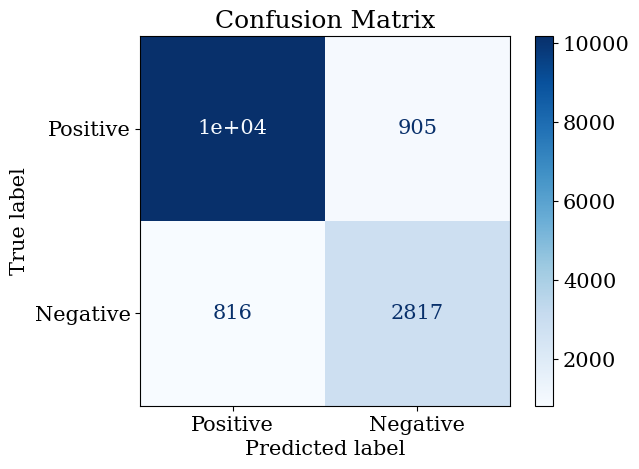


For atepc_final_aggregated_sentiment :

Total Number of reviews predicted as neutral: 3233
Number of reviews predicted as neutral but are actually Negative: 943
Number of reviews predicted as neutral but are actually Positive: 2290
Left with 11492 reviews:
Number of actual Negative Reviews: 2690
Number of actual Positive Reviews: 8802


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/valida

              precision    recall  f1-score   support

    Positive       0.60      0.76      0.67      2690
    Negative       0.92      0.85      0.88      8802

    accuracy                           0.83     11492
   macro avg       0.76      0.80      0.78     11492
weighted avg       0.85      0.83      0.83     11492

Accuracy: 0.8270971110337626
Precision: 0.9201084946369128
Recall: 0.847875482844808
F1-score: 0.8825164074971914
Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/valida

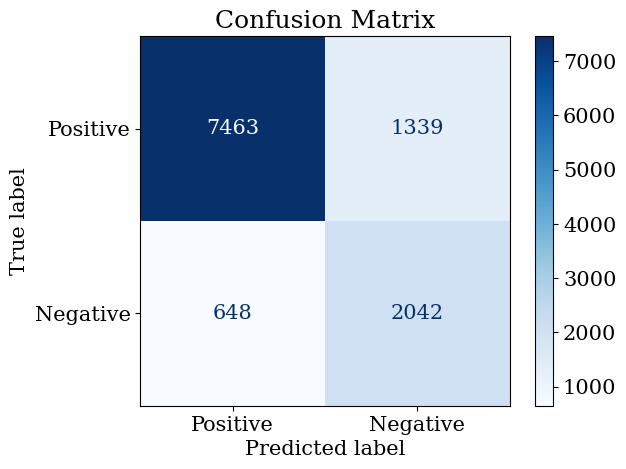


For vader_sentiment :

Total Number of reviews predicted as neutral: 272
Number of reviews predicted as neutral but are actually Negative: 114
Number of reviews predicted as neutral but are actually Positive: 158
Left with 14453 reviews:
Number of actual Negative Reviews: 3519
Number of actual Positive Reviews: 10934


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/valida

              precision    recall  f1-score   support

    Positive       0.78      0.40      0.53      3519
    Negative       0.83      0.96      0.89     10934

    accuracy                           0.83     14453
   macro avg       0.81      0.68      0.71     14453
weighted avg       0.82      0.83      0.80     14453

Accuracy: 0.8262644433681589
Precision: 0.8326882060194328
Recall: 0.9640570696908725
F1-score: 0.8935701267325054
Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/valida

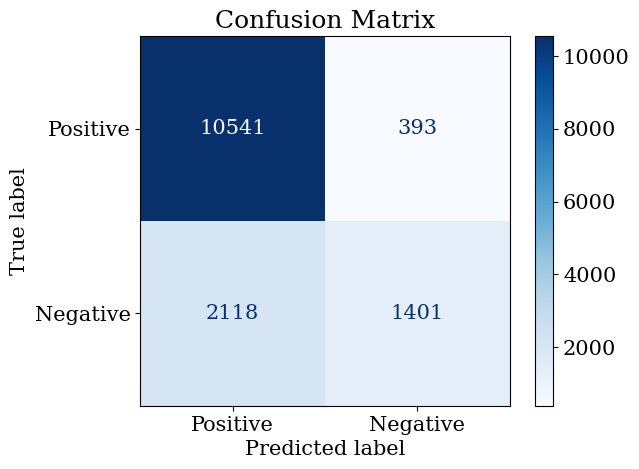

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

columns = ['BERT_Sentiment','atepc_final_aggregated_sentiment','vader_sentiment']

for column in columns:
    
    print('\nFor',column,':\n')
    
    ###check how many of them predicted as neutral:
    
    neutral_predictions = merged_df_company_reviews_atepc_no_ratings_3[merged_df_company_reviews_atepc_no_ratings_3[column]=='Neutral']
    print("Total Number of reviews predicted as neutral:",len(neutral_predictions))
    print("Number of reviews predicted as neutral but are actually Negative:",len(neutral_predictions[neutral_predictions['Sentiment']=='Negative']))
    print("Number of reviews predicted as neutral but are actually Positive:",len(neutral_predictions[neutral_predictions['Sentiment']=='Positive']))
    
    positive_negative_predictions = merged_df_company_reviews_atepc_no_ratings_3[merged_df_company_reviews_atepc_no_ratings_3[column]!='Neutral']
    print("Left with",len(positive_negative_predictions),'reviews:')
    print("Number of actual Negative Reviews:",len(positive_negative_predictions[positive_negative_predictions['Sentiment']=='Negative']))
    print("Number of actual Positive Reviews:",len(positive_negative_predictions[positive_negative_predictions['Sentiment']=='Positive']))
          
          
    y_true = positive_negative_predictions['Sentiment']
    
    y_pred = positive_negative_predictions[column]

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred, pos_label='Positive')

    # Calculate recall
    recall = recall_score(y_true, y_pred, pos_label='Positive')

    # Calculate F1-score
    f1 = f1_score(y_true, y_pred, pos_label='Positive')
    
    # Define the labels
    labels = ['Positive','Negative']
    
    # Calculate and print the classification report
    print(classification_report(y_true, y_pred, target_names=labels))

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()